In [6]:
# Dependencies
import pandas as pd
import numpy as np
import seaborn as sea

# Defaults
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# File Import
completeData = pd.read_csv('../data/completeSeasonData2021.csv')
completeData = completeData.drop('Unnamed: 0', axis=1)

In [29]:
completeData

,school,a_losses,a_wins,ast,ast_pct,ast_per_tov,blk,blk_pct,c_losses,c_wins,drs_pct,efg_pct,fg,fg_pct,fga,ft,ft_pct,ft_per_fga,fta,fta_ar,games,h_losses,h_wins,losses,minutes,o_ast,o_ast_pct,o_ast_per_tov,o_blk,o_blk_pct,o_drs_pct,o_efg_pct,o_fg,o_fg_pct,o_fga,o_ft,o_ft_pct,o_ft_per_fga,o_fta,o_fta_ar,o_off_rtg,o_orb,o_orb_pct,o_ors_pct,o_pace,o_pf,o_points,o_poss,o_stl,o_stl_pct,o_three_p,o_three_p_ar,o_three_p_pct,o_three_pa,o_tov,o_tov_pct,o_trb,o_trb_pct,o_trs_pct,o_ts_pct,o_two_p,o_two_p_pct,o_two_pa,off_rtg,orb,orb_pct,ors_pct,pace,pf,poss,rank,sos,srs,stl,stl_pct,t_points,three_p,three_p_ar,three_p_pct,three_pa,tov,tov_pct,trb,trb_pct,trs_pct,ts_pct,two_p,two_p_pct,two_pa,w_pct,wins
0,Abilene Christian,4,5,450,65.6,1.293103,79,9.5,2,13,0.727056,0.522,686,0.457,1500,358,0.664,0.239,539,0.359,25,0,13,4,1000,252,49.6,0.488372,83,8.9,0.689085,0.454,508,0.400,1270,366,0.691,0.288,530,0.417,83.6,229,27.3,0.272944,72.6,520,1518,1815.0,163,9.0,136,0.346,0.310,439,516,25.3,854,48.9,0.962029,0.499,372,0.447653,831,106.0,282,31.1,0.310915,72.6,497,1815.0,1,-8.11,5.18,245,13.5,1924,194,0.375,0.345,563,348,16.5,892,51.1,1.037971,0.548,492,0.525080,937,0.840,21
1,Air Force,10,1,294,58.8,0.844828,55,7.4,17,3,0.644886,0.524,500,0.447,1119,244,0.695,0.218,351,0.314,24,8,3,19,960,348,55.9,1.051360,50,8.2,0.841108,0.570,623,0.496,1255,287,0.685,0.229,419,0.334,112.3,250,35.5,0.355114,63.7,405,1718,1528.8,144,9.4,185,0.409,0.361,513,331,18.5,827,59.5,1.196222,0.591,438,0.590296,742,92.5,109,15.9,0.158892,63.7,402,1528.8,2,0.32,-12.26,168,11.0,1416,172,0.455,0.338,509,348,21.3,563,40.5,0.803778,0.551,328,0.537705,610,0.208,5
2,Akron,5,5,285,49.7,1.117647,76,8.9,6,12,0.722500,0.527,573,0.448,1280,300,0.758,0.234,396,0.309,21,1,9,7,845,259,46.2,1.003876,45,6.7,0.688976,0.487,561,0.433,1297,249,0.728,0.192,342,0.264,101.4,222,27.8,0.277500,70.6,385,1512,1482.6,117,7.8,141,0.345,0.315,447,258,15.0,747,47.8,0.966476,0.518,420,0.494118,850,110.7,237,31.1,0.311024,70.6,380,1482.6,3,-1.33,2.88,110,7.4,1650,204,0.473,0.337,605,255,14.8,815,52.2,1.033524,0.562,369,0.546667,675,0.667,14
3,Alabama A&M,7,1,165,47.6,0.720524,54,9.1,9,4,0.707980,0.448,347,0.400,868,173,0.627,0.199,276,0.318,15,2,5,9,610,188,53.7,0.979167,40,6.9,0.719298,0.440,350,0.393,891,224,0.673,0.251,333,0.374,94.3,172,29.2,0.292020,70.1,251,1008,1051.5,121,11.3,84,0.333,0.283,297,192,15.5,582,50.2,1.011319,0.480,266,0.447811,594,88.9,160,28.1,0.280702,70.1,273,1051.5,4,-15.12,-18.99,82,7.7,950,83,0.329,0.290,286,229,18.6,577,49.8,0.988681,0.475,264,0.453608,582,0.400,6
4,Alabama-Birmingham,4,6,289,39.3,1.010490,112,11.9,5,13,0.742917,0.496,735,0.454,1619,365,0.694,0.225,526,0.325,27,2,15,6,1080,281,47.6,0.625835,95,8.1,0.709016,0.456,590,0.401,1473,282,0.689,0.191,409,0.278,86.8,245,25.7,0.257083,69.3,453,1624,1871.1,114,6.1,162,0.360,0.305,531,449,21.2,937,48.6,0.966099,0.487,428,0.454352,942,105.4,284,29.1,0.290984,69.3,416,1871.1,5,-3.92,6.12,218,11.7,1972,137,0.276,0.306,447,286,13.3,992,51.4,1.033901,0.528,598,0.510239,1172,0.778,21
5,Alabama State,8,1,175,45.7,0.601375,43,6.1,14,4,0.704403,0.435,383,0.380,1009,279,0.647,0.277,431,0.427,18,6,3,14,720,227,49.8,0.847015,75,11.4,0.704611,0.489,456,0.438,1042,268,0.696,0.257,385,0.369,98.9,188,29.6,0.295597,72.4,388,1288,1303.2,139,10.7,108,0.319,0.325,332,268,18.0,677,50.9,1.000208,0.526,348,0.490141,710,88.8,205,29.5,0.295389,72.4,343,1303.2,6,-17.12,-24.45,110,8.4,1156,111,0.347,0.317,350,291,19.3,653,49.1,0.999792,0.476,272,0.412747,659,0.222,4
6,Alabama,3,7,381,51.2,0.989610,112,10.1,2,16,0.711754,0.514,744,0.431,1728,373,0.715,0.216,522,0.302,27,1,12,6,1080,300,44.1,0.692841,127,13.9,0.693107,0.457,680,0.409,1664,376,0.684,0.226,550,0.331,92.9,309,28.8,0.288246,75.7,506,1898,2043.9,220,10.8,162,0.335,0.290,558,433,18.4,1043,48.9,0.981353,0.493,518,0.468354,1106,105.2,325,30.7,0.306893,75.7,506,2043.9,7,10.26,19.55,234,11.5,2149,288,0.470,0.355,812,385,16.3,1088,51.1,1.018647,0.544,456,0.497817,916,0.778,21
7,Albany (NY),4,2,1

In [12]:
completeData.columns

Index(['school', 'a_losses', 'a_wins', 'ast', 'ast_pct', 'ast_per_tov', 'blk',
       'blk_pct', 'c_losses', 'c_wins', 'drs_pct', 'efg_pct', 'fg', 'fg_pct',
       'fga', 'ft', 'ft_pct', 'ft_per_fga', 'fta', 'fta_ar', 'games',
       'h_losses', 'h_wins', 'losses', 'minutes', 'o_ast', 'o_ast_pct',
       'o_ast_per_tov', 'o_blk', 'o_blk_pct', 'o_drs_pct', 'o_efg_pct', 'o_fg',
       'o_fg_pct', 'o_fga', 'o_ft', 'o_ft_pct', 'o_ft_per_fga', 'o_fta',
       'o_fta_ar', 'o_off_rtg', 'o_orb', 'o_orb_pct', 'o_ors_pct', 'o_pace',
       'o_pf', 'o_points', 'o_poss', 'o_stl', 'o_stl_pct', 'o_three_p',
       'o_three_p_ar', 'o_three_p_pct', 'o_three_pa', 'o_tov', 'o_tov_pct',
       'o_trb', 'o_trb_pct', 'o_trs_pct', 'o_ts_pct', 'o_two_p', 'o_two_p_pct',
       'o_two_pa', 'off_rtg', 'orb', 'orb_pct', 'ors_pct', 'pace', 'pf',
       'poss', 'rank', 'sos', 'srs', 'stl', 'stl_pct', 't_points', 'three_p',
       'three_p_ar', 'three_p_pct', 'three_pa', 'tov', 'tov_pct', 'trb',
       'trb_pct', '

In [42]:
# Calculations
calculations = pd.DataFrame()
calculations['expectedPoints'] = ((completeData['poss'] * completeData['o_three_p_ar'] * \
    completeData['o_three_p_pct']) + (completeData['poss'] * (1 - completeData['o_three_p_ar']) * \
    completeData['o_two_p_pct']) + completeData['o_ft']) / completeData['o_points']

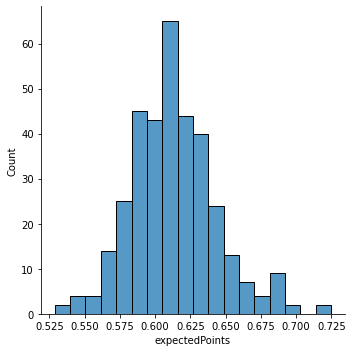

In [43]:
sea.displot(calculations, x='expectedPoints')